<a href="https://colab.research.google.com/github/Mariopromo/IA_IB_AgoDec2024/blob/main/PIA_MINV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
augmented-alzheimer-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archivos extraídos: ['AugmentedAlzheimerDataset', 'OriginalDataset']
Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.
Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.4618 - loss: 1.1299 - val_accuracy: 0.6929 - val_loss: 0.6717
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.6708 - loss: 0.7054 - val_accuracy: 0.7735 - val_loss: 0.5008
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.7534 - loss: 0.5483 - val_accuracy: 0.8224 - val_loss: 0.3935
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.8045 - loss: 0.4426 - val_accuracy: 0.8426 - val_loss: 0.3628
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


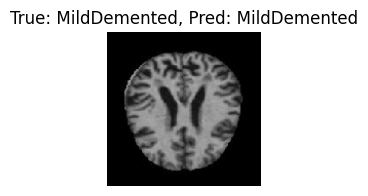

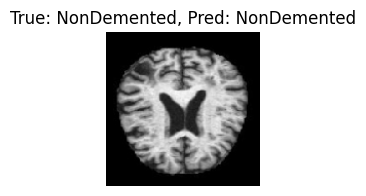

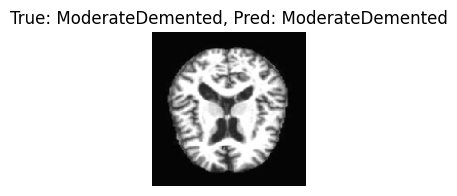

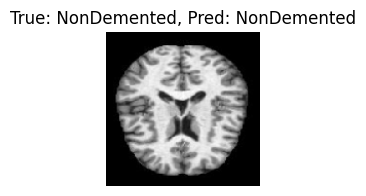

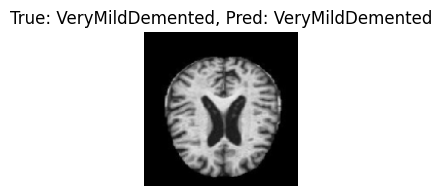

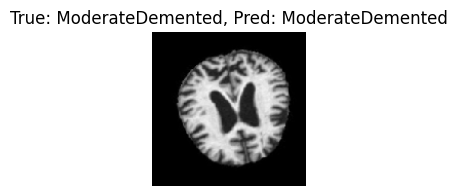

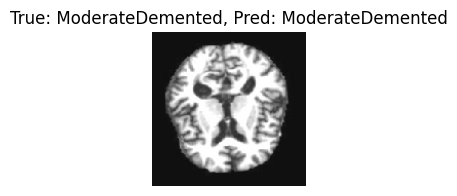

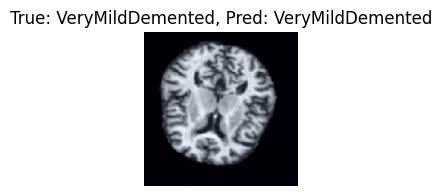

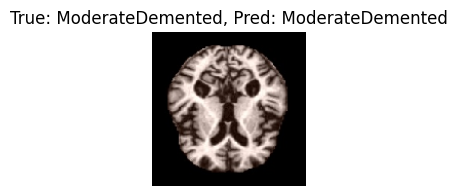

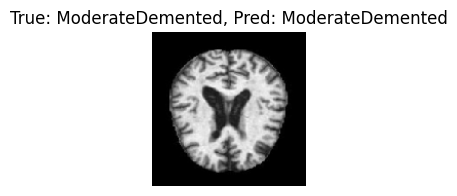

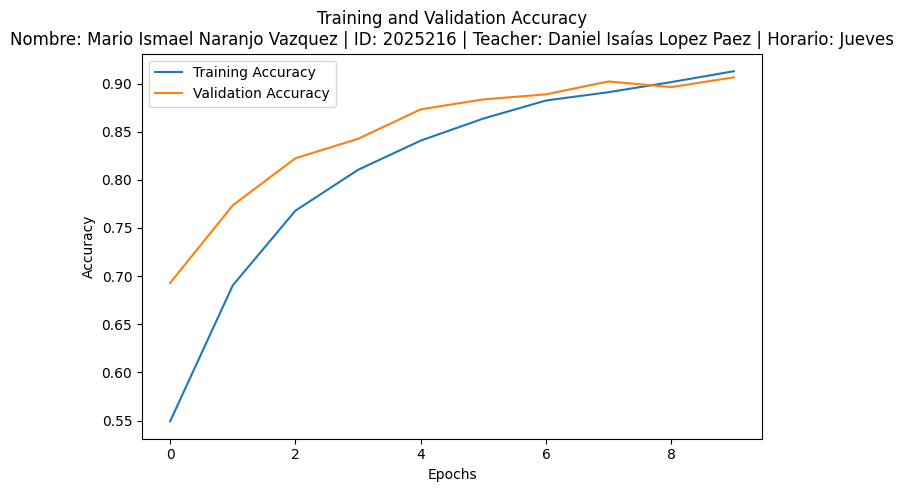

In [8]:
# Variables Personalizadas
nombre = "Mario Ismael Naranjo Vazquez"
id_estudiante = "2025216"
profesor = "Teacher: Daniel Isaías Lopez Paez"
horario = "Horario: Jueves"

# Instalación y configuración de la API de Kaggle
!pip install kaggle
import os
from google.colab import files

# Sube el archivo kaggle.json
uploaded = files.upload()

# Configuración de credenciales de Kaggle
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Descarga el dataset
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset -p /content/

# Extracción del archivo .zip
import zipfile
zip_path = '/content/augmented-alzheimer-mri-dataset.zip'
extract_path = '/content/augmented-alzheimer-mri-dataset/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)

# Librerías para el modelo
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Definir la ruta del dataset
dataset_path = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"

# Preprocesamiento de datos
img_size = 150
batch_size = 32
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='training'
)
val_data = datagen.flow_from_directory(
    dataset_path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='validation'
)

# Definición del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

# Compilación y entrenamiento
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

# Guardar el modelo
model.save("cnn_alzheimer_model.h5")

# Pruebas y predicciones
test_images, test_labels = next(val_data)
predictions = model.predict(test_images)
class_labels = list(train_data.class_indices.keys())

# Mostrar predicciones
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True: {class_labels[np.argmax(test_labels[i])]}, Pred: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

# Gráfica de precisión
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Training and Validation Accuracy\nNombre: {nombre} | ID: {id_estudiante} | {profesor} | {horario}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
